In [136]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Wilberforce Pendulum

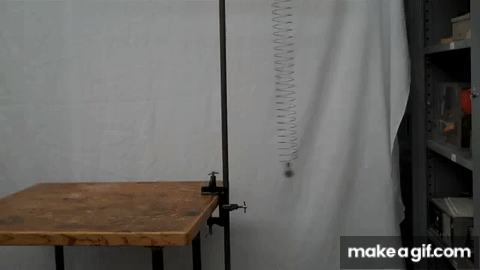

In [137]:
file = r"C:\Users\Florian Moga\Desktop\master\sem2\va2\3A70_10_Wilberforce_Pendulum.gif"
pendulum = Image(open(file,'rb').read(), width = 900)
pendulum

# Kalman Filter Pseudocode

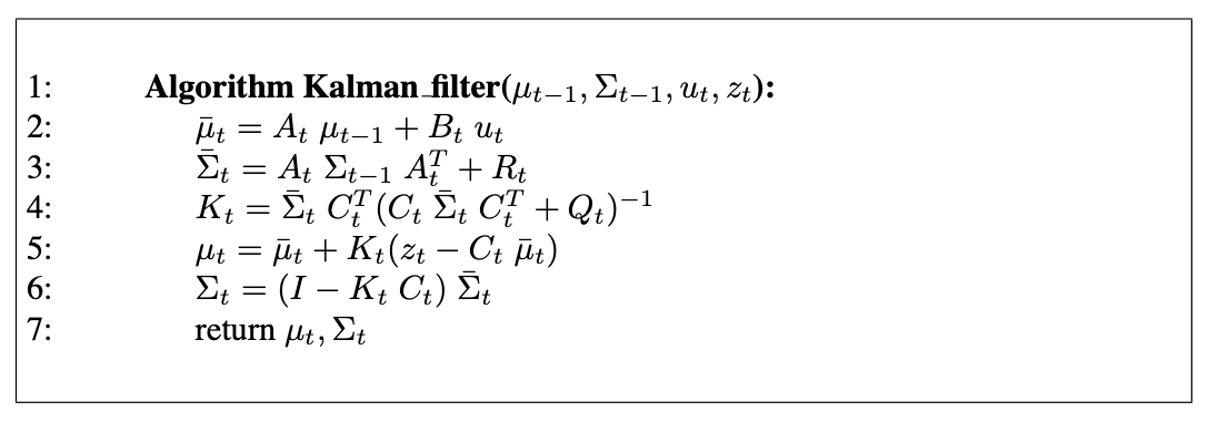

In [138]:
file = r"C:\Users\Florian Moga\Desktop\master\sem2\va2\Kalman Filter Algorithm.png"
Image(filename=file)
# μ - x, y
# ∑ - P
# nu am vectorul de control B

# State and measurement noise

In [152]:
file = r"C:\Users\Florian Moga\Desktop\master\sem2\va2\Kalman Filter Measurements Noise.xlsx"
df = pd.read_excel(file)
df.head()
# mean 0 si varianta 0.02 si 0.2 

Unnamed: 0   Unnamed: 1  @dropdown         Unnamed: 3
0         NaN  state noise        NaN  measurement noise
1         1.0    -0.009225        NaN             -0.244
2         2.0     0.009845        NaN             -0.065
3         3.0        0.019        NaN             -0.016
4         4.0     0.004768        NaN              0.324

In [140]:
# Loading noises
state_noise_df = df.iloc[1:, 1]
measurement_noise_df = df.iloc[1:, 3]
state_noise = state_noise_df.values.tolist()
measurement_noise = measurement_noise_df.values.tolist()

# Kalman Filter Code

In [141]:
def kalman(state_noise_calculated, state_noise, measurement_noise):
    ###
    # Matrix initialization
    # μ - x,y
    # ∑ - K
    ###
    C = np.array([[1, 0]])
    P = np.zeros((2, 2), dtype=int)
    Pt = np.zeros((2, 2), dtype=int)
    Q = np.array([[0, 0],
                  [0, 0.02]])
    K = np.zeros((2, 1), dtype=int)
    R = np.array([[0],
                  [0.2]])
    I = np.eye(2)
    h = 0.05
    A = np.array([[1, h],
                  [-h, 1-h*h]])
    init_measurement = np.array([[1],
                                 [1]])
    ideal = [init_measurement]
    ###
    # Create pendulum measurements
    ###
    for i in range(200):
        init_measurement = np.dot(A, init_measurement)
        ###
        # Apply state noise
        ###
        if state_noise_calculated:
            init_measurement += state_noise[i]
        ideal.append(init_measurement)

    x, v, y = [], [], []
    x_kalman, v_kalman = [], []
    time = 0
    first = True
    ###
    # Kalman filter
    ###
    for i in range(200):
        ###
        # Exact/perfect knowledge
        ###
        v.append(ideal[i][1])
        x.append(ideal[i][0])
        ###
        # Apply measurement noise
        ###
        yn = np.dot(C, np.array([x[i], v[i]])) + measurement_noise[i]
        y.append(yn)
        ###
        # Prediction
        ###
        # 2
        if first:
            xk, vk = 1, 1
            tilda = np.dot(A, np.array([[1], [1]]))
            first = False
        else:
            xk, vk = new_measurements[0], new_measurements[1]
            tilda = np.dot(A, np.array([xk, vk]))
        # 3
        Pt = np.dot(np.dot(A, P), A.T) + Q

        ###
        # Correction
        ###
        # 4
        K = np.dot(np.dot(C, Pt), (np.dot(np.dot(C, Pt), C.T) + R))
        # 5
        new_measurements = tilda + np.dot(K, (yn-np.dot(np.dot(C, A), [xk, vk])))
        x_kalman.append(new_measurements[0])
        v_kalman.append(new_measurements[1])
        time += 1
        # 6
        P = np.dot((I - np.dot(K, C)), Pt)


    y = [i[0] for i in y]
    return x, y, v, x_kalman, v_kalman

# Without system noise example

In [142]:
# System noise False
x, y, v, x_kalman, v_kalman = kalman(False, state_noise, measurement_noise)
ideal_pendulum = x

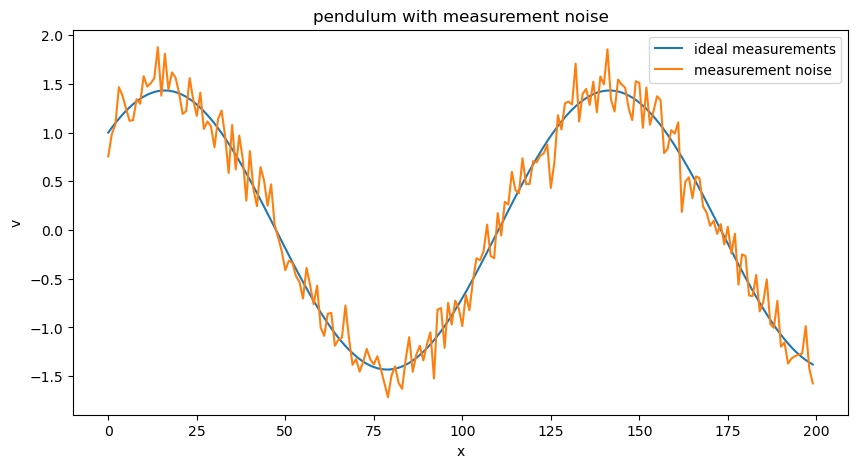

In [143]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x, label="ideal measurements")
plt.plot(y, label="measurement noise")

# plt.plot(x, v_state_noise, label="with state noise")
plt.legend()
plt.show()

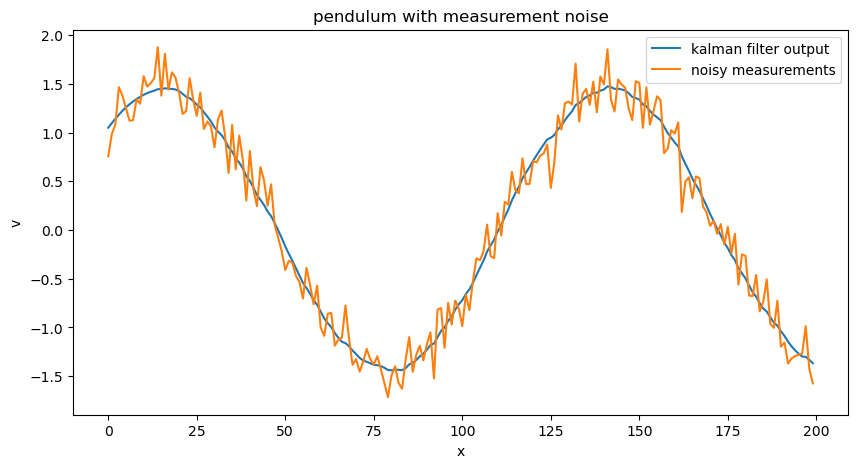

In [144]:
plt.figure(figsize=(10, 5))
plt.title("pendulum with measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x_kalman, label="kalman filter output")
plt.plot(y, label="noisy measurements")

plt.legend()
plt.show()

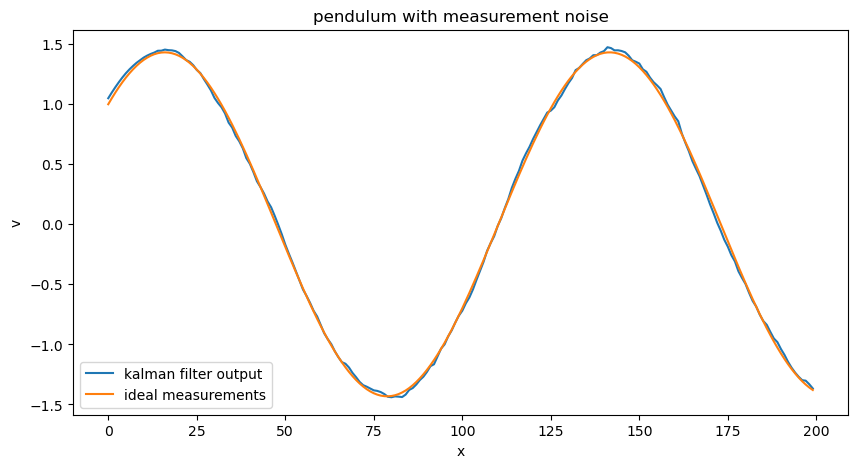

In [145]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x_kalman, label="kalman filter output")
plt.plot(x, label="ideal measurements")

plt.legend()
plt.show()

# With system noise example

In [146]:
# system noise True
x, y, v, x_kalman, v_kalman = kalman(True, state_noise, measurement_noise)

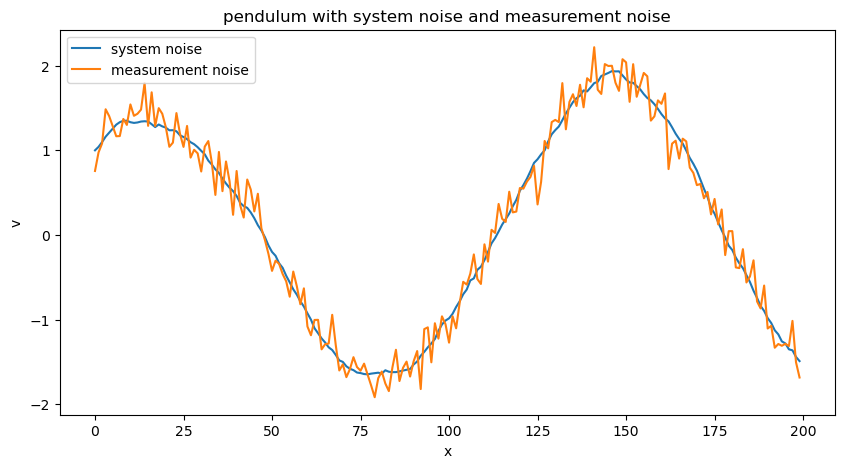

In [147]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with system noise and measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x, label="system noise")
plt.plot(y, label="measurement noise")

# plt.plot(x, v_state_noise, label="with state noise")
plt.legend()
plt.show()

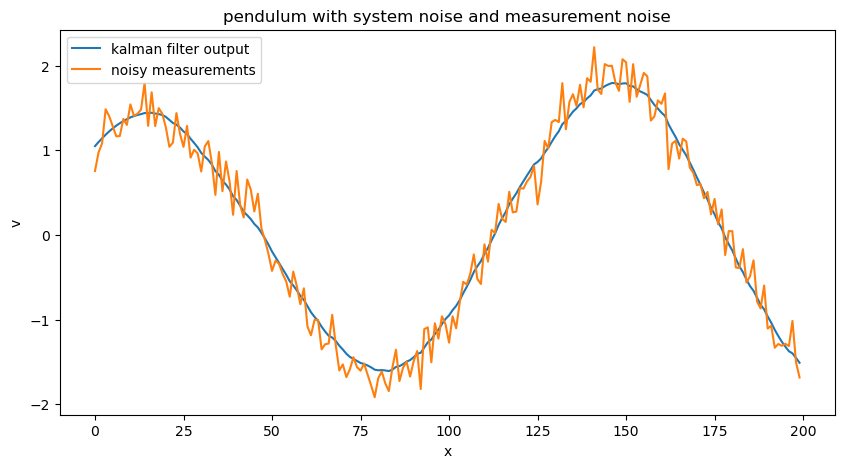

In [148]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with system noise and measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x_kalman, label="kalman filter output")
plt.plot(y, label="noisy measurements")

plt.legend()
plt.show()

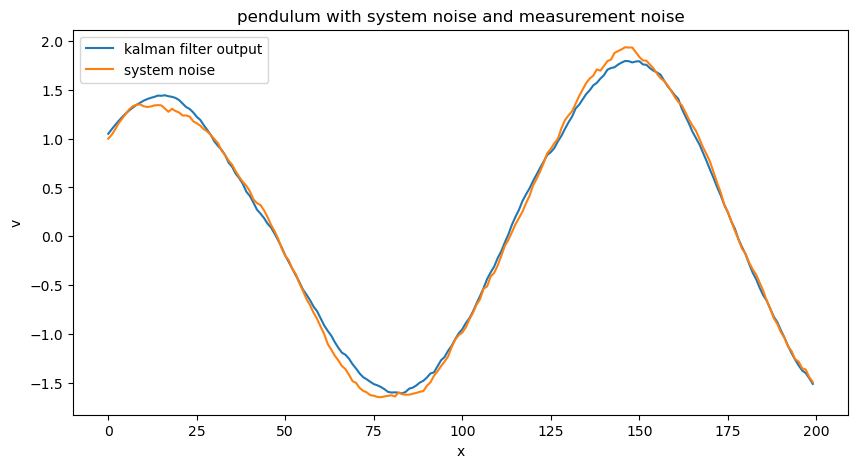

In [149]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with system noise and measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x_kalman, label="kalman filter output")
plt.plot(x, label="system noise")

plt.legend()
plt.show()

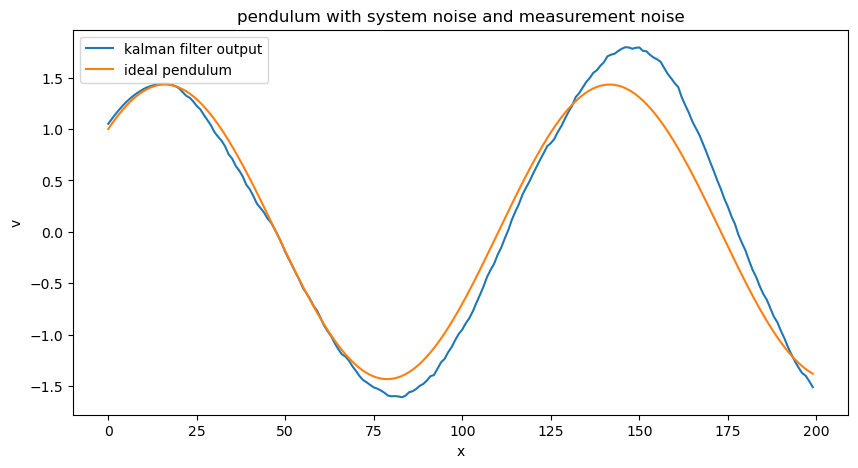

In [150]:
plt.figure(figsize=(10, 5))

plt.title("pendulum with system noise and measurement noise")
plt.xlabel('x')
plt.ylabel('v')

plt.plot(x_kalman, label="kalman filter output")
plt.plot(ideal_pendulum, label="ideal pendulum")

plt.legend()
plt.show()

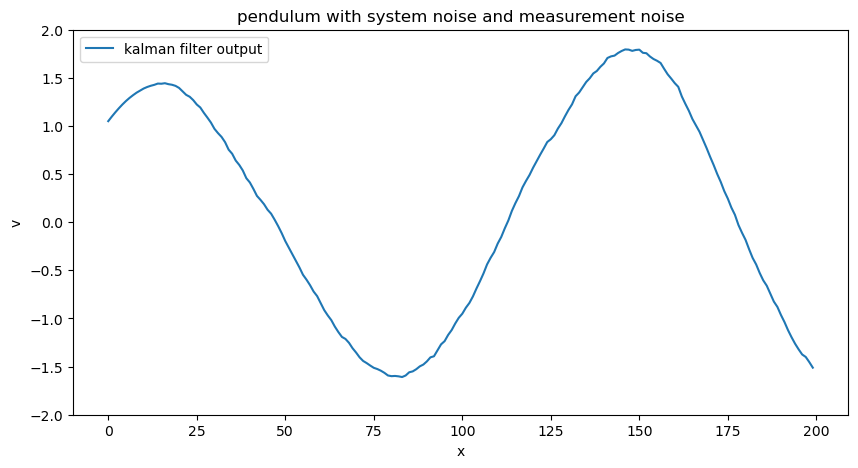

In [151]:
plt.figure(figsize=(10, 5))
plt.title("pendulum with system noise and measurement noise")
plt.xlabel('x')
plt.ylabel('v')
plt.ylim(-2, 2)
plt.plot(x_kalman, label="kalman filter output")

plt.legend()
plt.show()